In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [148]:
# Load the dataset
df = pd.read_csv('DiabetesDataBangladesh.csv')

In [149]:
# Check the first few rows
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [150]:
# Display the last 5 rows of the dataset 
print(df.tail())

     Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
515   39  Female      Yes        Yes                Yes       No        Yes   
516   48  Female      Yes        Yes                Yes      Yes        Yes   
517   58  Female      Yes        Yes                Yes      Yes        Yes   
518   32  Female       No         No                 No      Yes         No   
519   42    Male       No         No                 No       No         No   

    Genital thrush visual blurring Itching Irritability delayed healing  \
515             No              No     Yes           No             Yes   
516             No              No     Yes          Yes             Yes   
517             No             Yes      No           No              No   
518             No             Yes     Yes           No             Yes   
519             No              No      No           No              No   

    partial paresis muscle stiffness Alopecia Obesity     class  
515     

In [151]:
# Get the summary of the dataset
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [152]:
# Check for missing values
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [153]:
# Get info on data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [154]:
# Show the column names
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [155]:
df.columns = map(str.lower, df.columns)

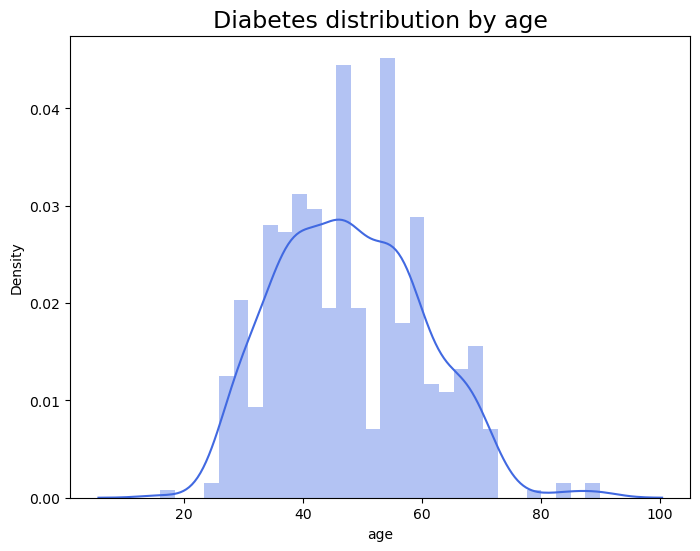

In [156]:
# Show diabetes cases by age
plt.figure(figsize=(8,6))
sns.distplot(df['age'],bins=30, color='royalblue')  
plt.title('Diabetes distribution by age', fontsize=17);

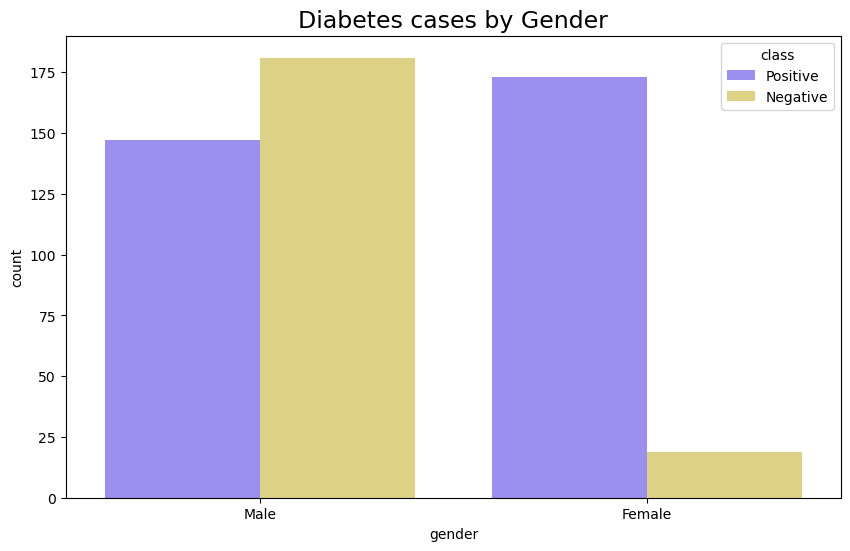

In [157]:
# Show diabetes cases by gender
plt.figure(figsize=(10, 6))  
sns.countplot(x='gender', hue='class', data=df, palette=['#9080ff', "#ebdc78"])
plt.title('Diabetes cases by Gender', fontsize=17)
plt.show()

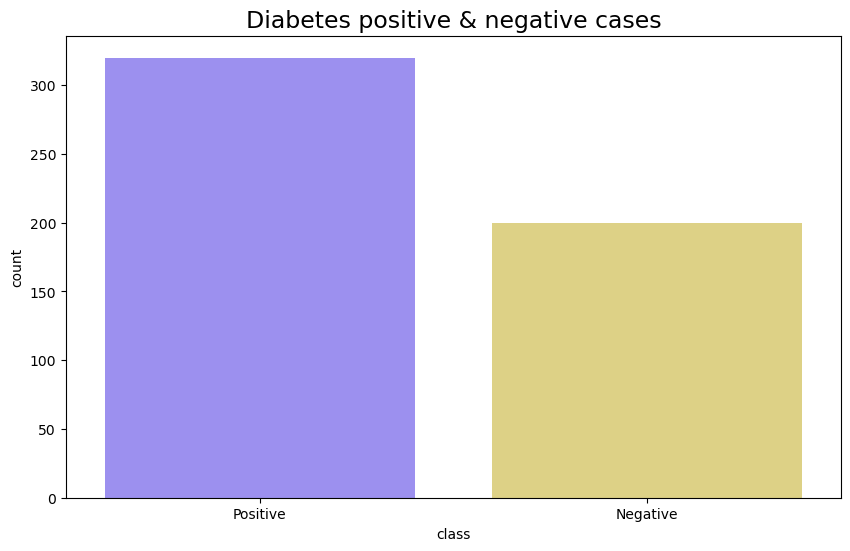

In [158]:
# Diabestes postive and negetive counts on 
plt.figure(figsize=(10, 6))  
sns.countplot(x='class', data=df, palette=['#9080ff', "#ebdc78"])
plt.title('Diabetes positive & negative cases', fontsize=17)
plt.show()


In [159]:
# Converte values of the features into interger type
df['gender'] = df['gender'].map({'Male':1,'Female':0})
df['class'] = df['class'].map({'Positive':1,'Negative':0})
df['polyuria'] = df['polyuria'].map({'Yes':1,'No':0})
df['polydipsia'] = df['polydipsia'].map({'Yes':1,'No':0})
df['sudden weight loss'] = df['sudden weight loss'].map({'Yes':1,'No':0})
df['weakness'] = df['weakness'].map({'Yes':1,'No':0})
df['polyphagia'] = df['polyphagia'].map({'Yes':1,'No':0})
df['genital thrush'] = df['genital thrush'].map({'Yes':1,'No':0})
df['visual blurring'] = df['visual blurring'].map({'Yes':1,'No':0})
df['itching'] = df['itching'].map({'Yes':1,'No':0})
df['irritability'] = df['irritability'].map({'Yes':1,'No':0})
df['delayed healing'] = df['delayed healing'].map({'Yes':1,'No':0})
df['partial paresis'] = df['partial paresis'].map({'Yes':1,'No':0})
df['muscle stiffness'] = df['muscle stiffness'].map({'Yes':1,'No':0})
df['alopecia'] = df['alopecia'].map({'Yes':1,'No':0})
df['obesity'] = df['obesity'].map({'Yes':1,'No':0})

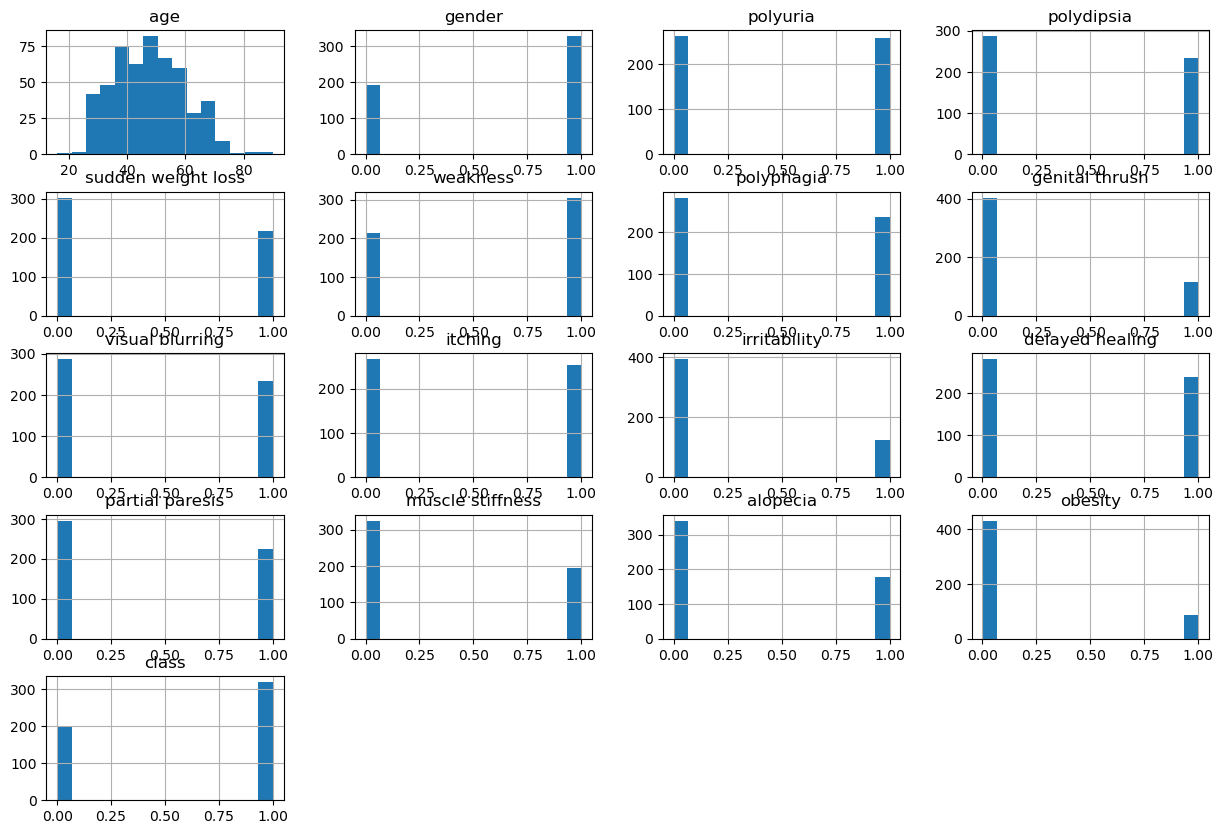

In [160]:
# visualize histograms for each feature
df.hist(bins=15, figsize=(15, 10))
plt.show()

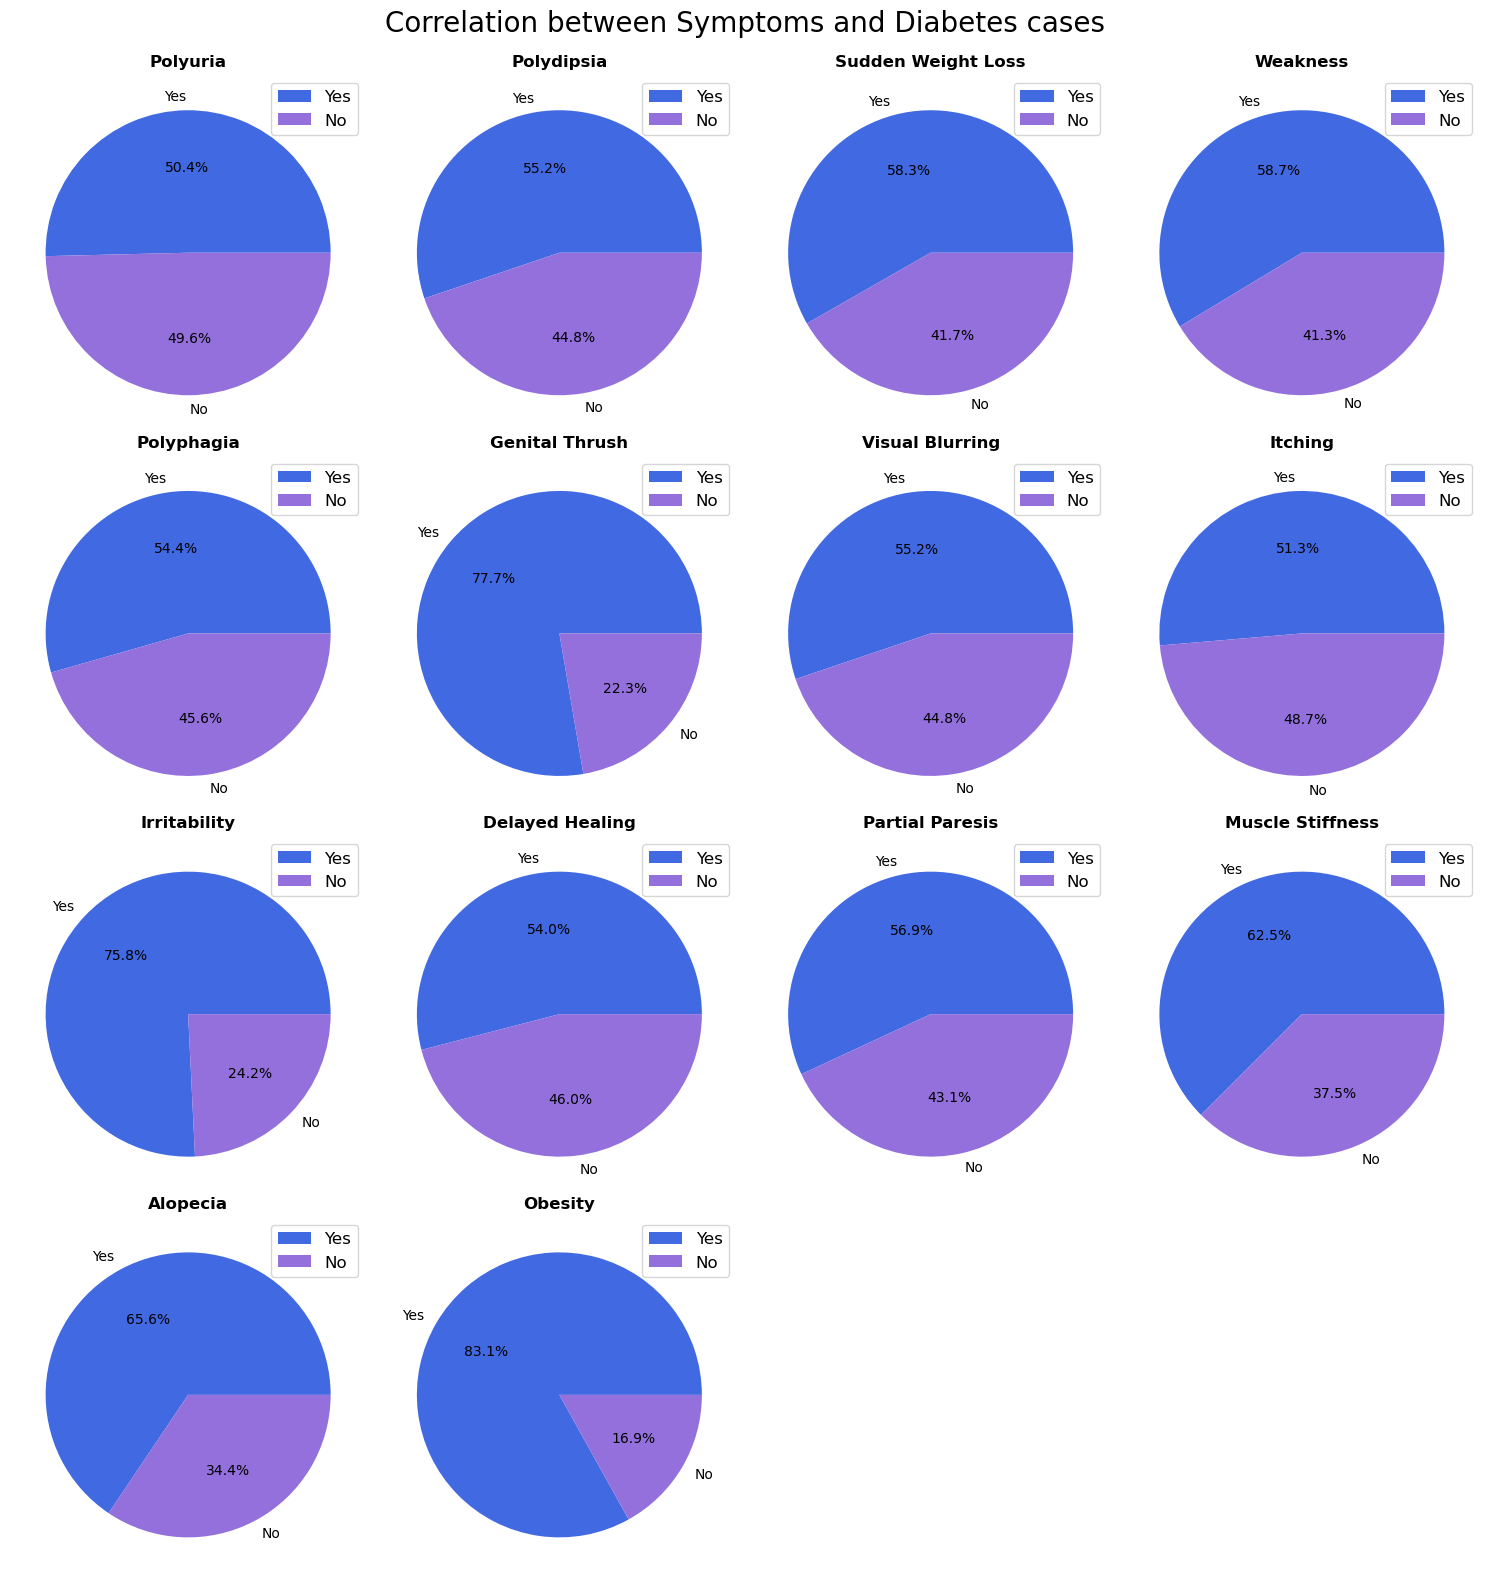

In [161]:
# Visulaize correlation between features and diabetes cases 
count = 1
plt.figure(figsize=(15,20))
plt.suptitle('Correlation between Symptoms and Diabetes cases'+ '\n', fontsize=20)
for i in df.columns:
    if i not in ['class', 'age', 'gender']:
        plt.subplot(5,4,count)
        plt.title(f'{i.title()}', fontweight='bold', fontsize=14)
        count +=1
        plt.tight_layout()
        df[i].value_counts().plot(kind="pie", colors=['royalblue','mediumpurple'],autopct='%1.1f%%',legend=True,labels=["Yes","No"])
        plt.ylabel('')
        plt.title(f'{i.title()}',fontweight='bold',fontsize=12)
        plt.legend(loc = "upper right",fontsize=12)
plt.tight_layout() 
plt.show()

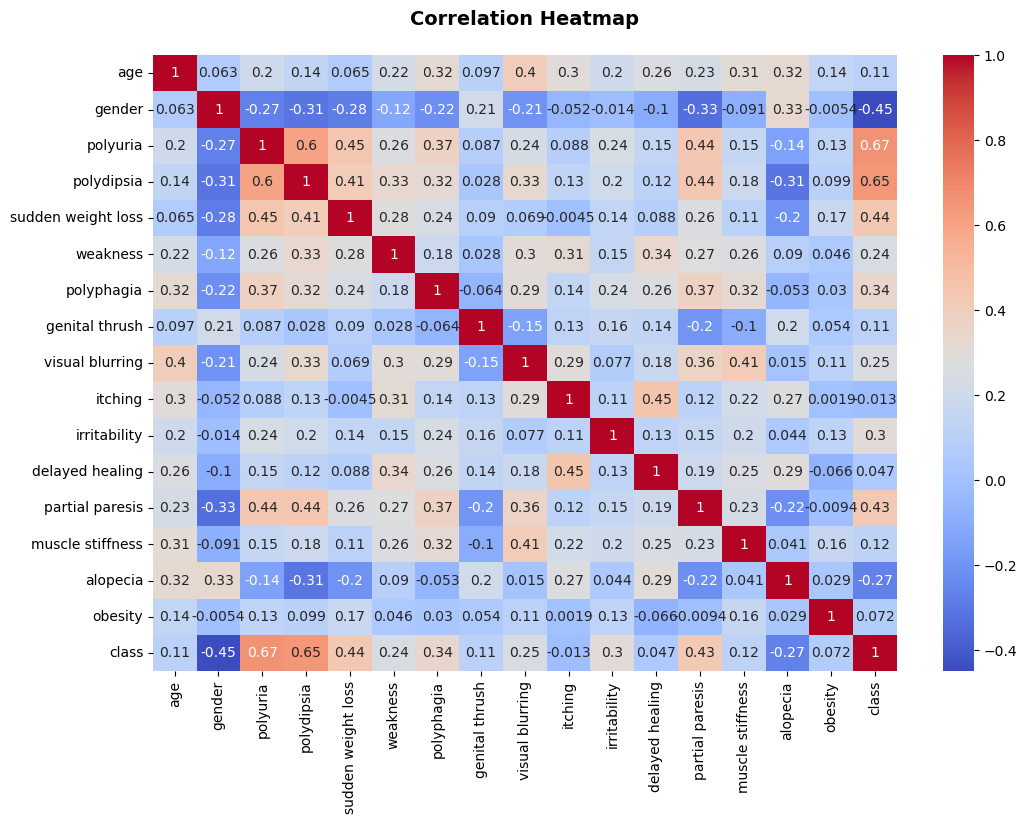

In [162]:
# Visualize the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap ='coolwarm')
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
plt.show()

In [163]:
Y = df['class']
X = df.drop('class', axis=1)

In [164]:
# # Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=1)

In [165]:
# Feature preprocessing and Scaling
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [166]:
X = ss.fit_transform(X)

In [192]:
# Logistic Regression model
lin_model=LogisticRegression()
# lin_model = LogisticRegression(penalty='l2',C=1,max_iter=4)
lin_model.fit(X_train,y_train)
lin_pred = lin_model.predict(X_test)
linscore = lin_model.score(X_test,y_test)

In [194]:
lin_error = mean_squared_error(y_test, lin_pred)
print("The Mean Squared Error For Linear Regression is: {}".format(lin_error))

The Mean Squared Error For Linear Regression is: 0.07692307692307693


In [196]:
linscore = lin_model.score(X_test,y_test)
lin_cm = confusion_matrix(y_test,lin_pred)
lin_cr = classification_report(y_test,lin_pred)
print('Logistic Regression results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(linscore *100))
print('\n')
print('Confusion Matrix')
print(lin_cm)
print('\n')
print('Classification report')
print(lin_cr)                    

Logistic Regression results
---------------------------
Accuracy is 92.31%


Confusion Matrix
[[52  6]
 [ 6 92]]


Classification report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        58
           1       0.94      0.94      0.94        98

    accuracy                           0.92       156
   macro avg       0.92      0.92      0.92       156
weighted avg       0.92      0.92      0.92       156



In [198]:
# SVM Model
svm_model=SVC(kernel='linear',random_state=0)
svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)

In [202]:
svm_error = mean_squared_error(y_test, svm_pred)
print("The Mean Squared Error For Support Vector Machine is: {}".format(svm_error))

The Mean Squared Error For Support Vector Machine is: 0.08333333333333333


In [204]:
svmscore= svm_model.score(X_test, y_test)
svm_cm = confusion_matrix(y_test,svm_pred)
svm_cr = classification_report(y_test,svm_pred)
print('Support Vector Machine results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(svmscore *100))
print('\n')
print('Confusion Matrix')
print(svm_cm)
print('\n')
print('Classification report')
print(svm_cr) 

Support Vector Machine results
---------------------------
Accuracy is 91.67%


Confusion Matrix
[[53  5]
 [ 8 90]]


Classification report
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        58
           1       0.95      0.92      0.93        98

    accuracy                           0.92       156
   macro avg       0.91      0.92      0.91       156
weighted avg       0.92      0.92      0.92       156



In [206]:
# Decision Tree Model
dtr_model = DecisionTreeClassifier(random_state=0)
dtr_model.fit(X_train,y_train)
dtr_pred = dtr_model.predict(X_test)

In [208]:
dtr_error = mean_squared_error(y_test, dtr_pred)
print("The Mean Squared Error For Decision Tree Regression is: {}".format(dtr_error))

The Mean Squared Error For Decision Tree Regression is: 0.019230769230769232


In [210]:
dtscore = dtr_model.score(X_test,y_test)
dt_cm = confusion_matrix(y_test,dtr_pred)
dt_cr = classification_report(y_test,dtr_pred)
print('Decision Tree results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(dtscore *100))
print('\n')
print('Confusion Matrix')
print(dt_cm)
print('\n')
print('Classification report')
print(dt_cr)   

Decision Tree results
---------------------------
Accuracy is 98.08%


Confusion Matrix
[[55  3]
 [ 0 98]]


Classification report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.97      1.00      0.98        98

    accuracy                           0.98       156
   macro avg       0.99      0.97      0.98       156
weighted avg       0.98      0.98      0.98       156



In [212]:
# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

In [214]:
nb_error = mean_squared_error(y_test, nb_pred)
print("The Mean Squared Error For Naive Bayes classifier is: {}".format(nb_error))

The Mean Squared Error For Naive Bayes classifier is: 0.09615384615384616


In [216]:
nbscore = nb_model.score(X_test,y_test)
nb_cm = confusion_matrix(y_test,nb_pred)
nb_cr = classification_report(y_test,nb_pred)
print('Naive Bayes classifier results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(nbscore *100))
print('\n')
print('Confusion Matrix')
print(nb_cm)
print('\n')
print('Classification report')
print(nb_cr) 

Naive Bayes classifier results
---------------------------
Accuracy is 90.38%


Confusion Matrix
[[52  6]
 [ 9 89]]


Classification report
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        58
           1       0.94      0.91      0.92        98

    accuracy                           0.90       156
   macro avg       0.89      0.90      0.90       156
weighted avg       0.91      0.90      0.90       156



In [218]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=15, random_state = 0)
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

In [220]:
rf_error = mean_squared_error(y_test, rf_pred)
print("The Mean Squared Error For Random Forest is: {}".format(rf_error))

The Mean Squared Error For Random Forest is: 0.02564102564102564


In [222]:
rfscore = rf_model.score(X_test,y_test)
rf_cm = confusion_matrix(y_test,rf_pred)
rf_cr = classification_report(y_test,rf_pred)
print('Random Forest results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(rfscore *100))
print('\n')
print('Confusion Matrix')
print(rf_cm)
print('\n')
print('Classification report')
print(rf_cr) 

Random Forest results
---------------------------
Accuracy is 97.44%


Confusion Matrix
[[55  3]
 [ 1 97]]


Classification report
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.97      0.99      0.98        98

    accuracy                           0.97       156
   macro avg       0.98      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156

